In [1]:
from fastai import *
from fastai.vision import *
import numpy as np

In [2]:
folder = 'aloe'
file = 'urls_aloe.csv'

In [6]:
folder = 'aloe'
file = 'urls_aloe.csv'


In [11]:
folder = 'yucca'
file = 'urls_yucca.csv'

In [12]:
path = Path('data/plants')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
path.ls()

[PosixPath('data/plants/yucca'), PosixPath('data/plants/aloe')]

In [8]:
classes = ['aloe', 'yucca']

In [13]:
download_images(path/folder/file, dest, max_pics=200)

In [ ]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True, max_size=500)

aloe


yucca


In [14]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
learn = cnn_learner(data, models.resnet34,metrics = error_rate)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.008605,0.495728,0.187500,01:47
1,0.673801,0.536742,0.112500,01:45
2,0.496800,0.481612,0.075000,01:44
3,0.376534,0.439011,0.075000,01:44


In [17]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses, indxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(indxs)

True

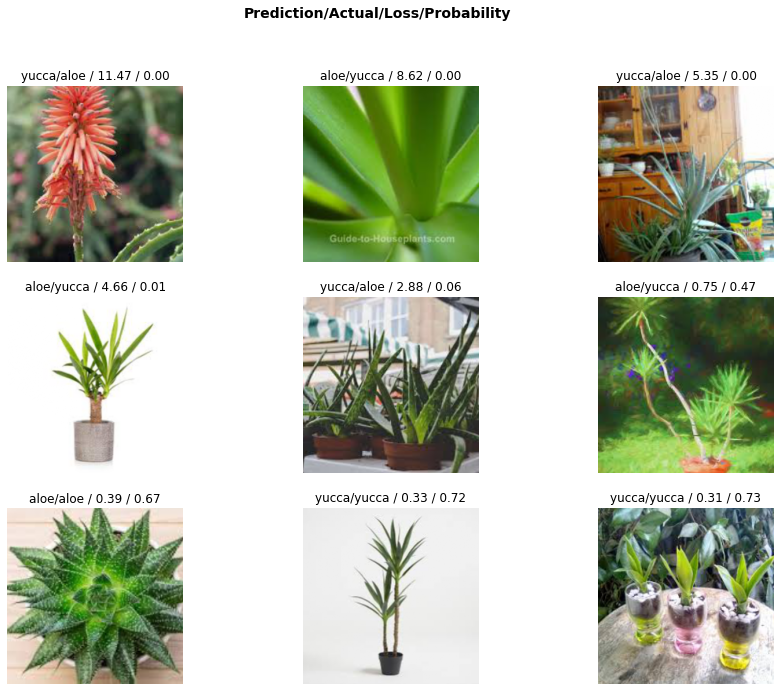

In [19]:
interp.plot_top_losses(9, figsize = (15,11))

Taking a look at what the model got wrong, it seems as though these images are extremely difficult to tell the difference between. I am having a hard time myself to distinguish that image[0] is even Aloe.

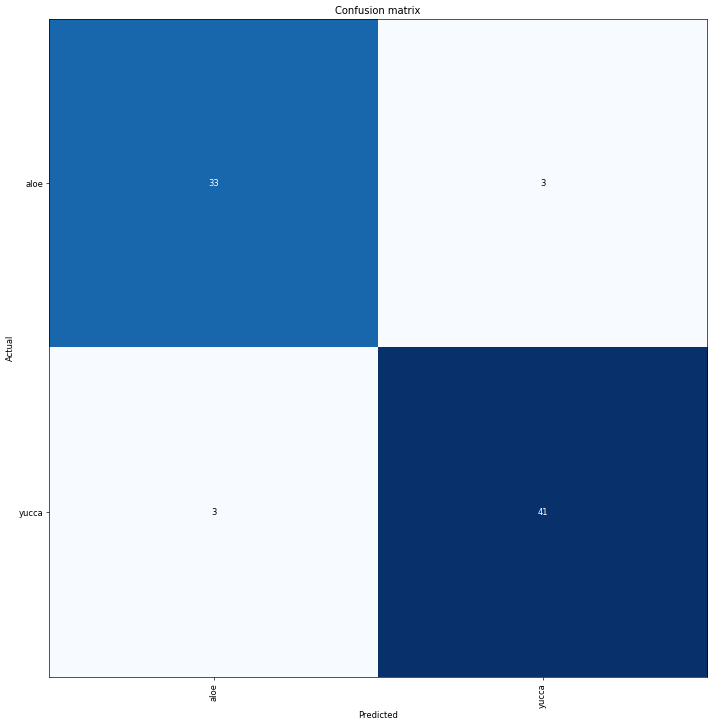

In [21]:
interp.plot_confusion_matrix(figsize=(12,12),dpi = 60)

In [22]:
interp.most_confused(min_val=2)

[('aloe', 'yucca', 3), ('yucca', 'aloe', 3)]

In [23]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.148996,1.437518,0.200000,02:37
1,0.164818,1.166953,0.137500,02:32


In [25]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yucca,yucca,yucca,yucca,yucca
Path: data/plants;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
aloe,aloe,yucca,aloe,yucca
Path: data/plants;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


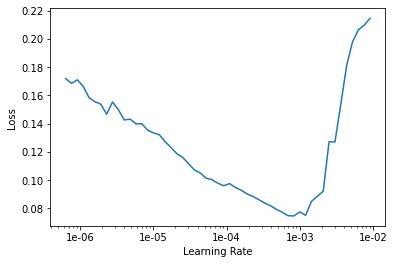

In [27]:
learn.recorder.plot()

In [28]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.186782,0.761252,0.125000,02:31
1,0.142774,0.334528,0.087500,02:29


In [29]:
learn.save('stage-2')

In [30]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yucca,yucca,yucca,yucca,yucca
Path: data/plants;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
aloe,aloe,yucca,aloe,yucca
Path: data/plants;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


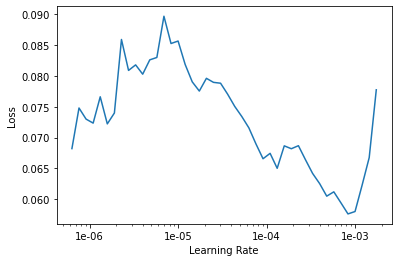

In [32]:
learn.recorder.plot()